# MÓDULO 15 - PRÁTICA: ANÁLISE UNIVARIADA

## 1) Importando bibliotecas e carregando base tratada

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando estilo dos gráficos
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

# Carregando base tratada do M14
df = pd.read_csv("base_tratada_mod14.csv")
df.head()


,id_cliente,genero,idoso,casado,dependentes,tempo_como_cliente,servico_telefonico,servico_internet,servico_seguranca,suporte_tecnico,streaming_tv,tipo_contrato,forma_pagamento,pagamento_mensal,total_pago,cancelou
0,7590-vhveg,female,0,yes,no,1,no,dsl,no,no,no,month-to-month,electronic check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,dsl,yes,no,no,one year,mailed check,56.95,1889.50,no
2,3668-qpybk,male,0,no,no,2,yes,dsl,yes,no,no,month-to-month,mailed check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,dsl,yes,yes,no,one year,bank transfer (automatic),71.45,1840.75,no
4,8191-xwszg,female,0,no,no,52,yes,no,no internet service,no internet service,no internet service,one year,mailed check,71.45,1022.95,no


## 2A) Estatísticas descritivas com `describe`

In [2]:

df.describe()


,idoso,tempo_como_cliente,pagamento_mensal,total_pago
count,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,66.342564,2290.087178
std,0.368135,24.636885,28.051718,2264.585643
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,8.000000,45.400000,402.337500
50%,0.000000,29.000000,71.450000,1402.900000
75%,0.000000,56.000000,87.712500,3867.162500
max,1.000000,72.000000,118.650000,8564.750000


## 2B) Identificando possíveis outliers em variáveis numéricas

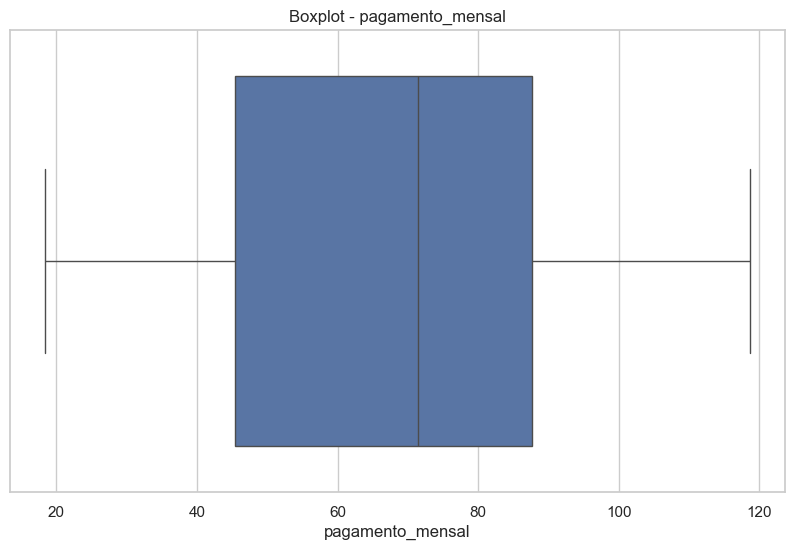

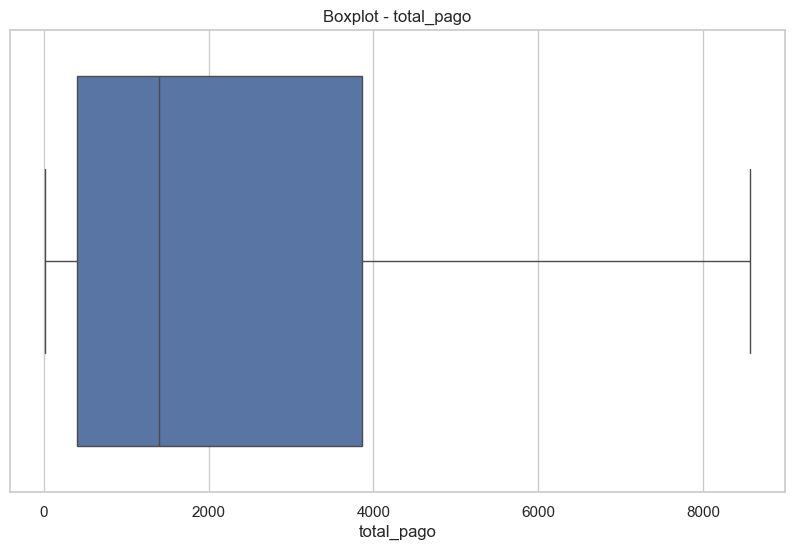

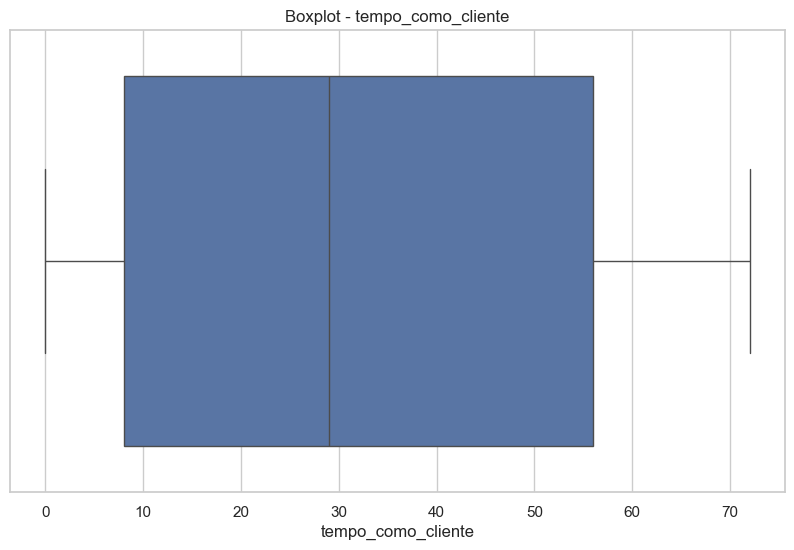

In [3]:

# Gráficos de boxplot
num_vars = ['pagamento_mensal', 'total_pago', 'tempo_como_cliente']

for col in num_vars:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()


## 2C) Gráficos de análise univariada

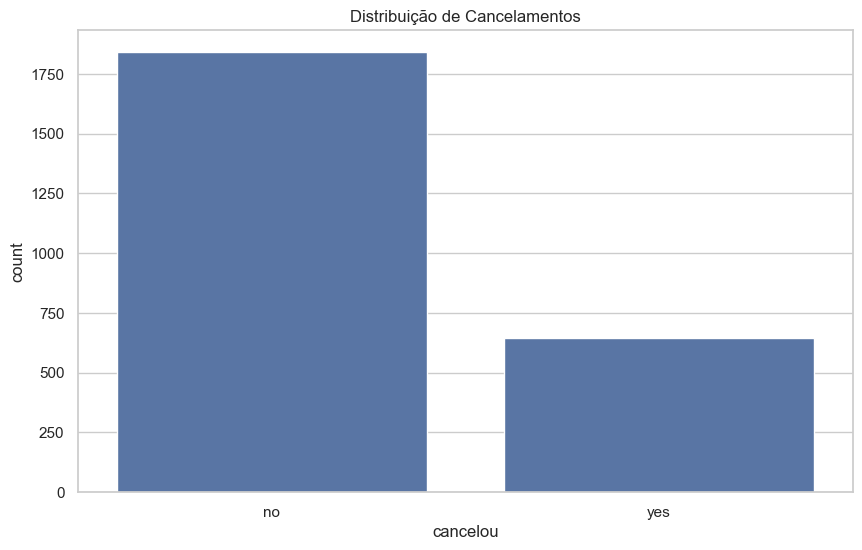

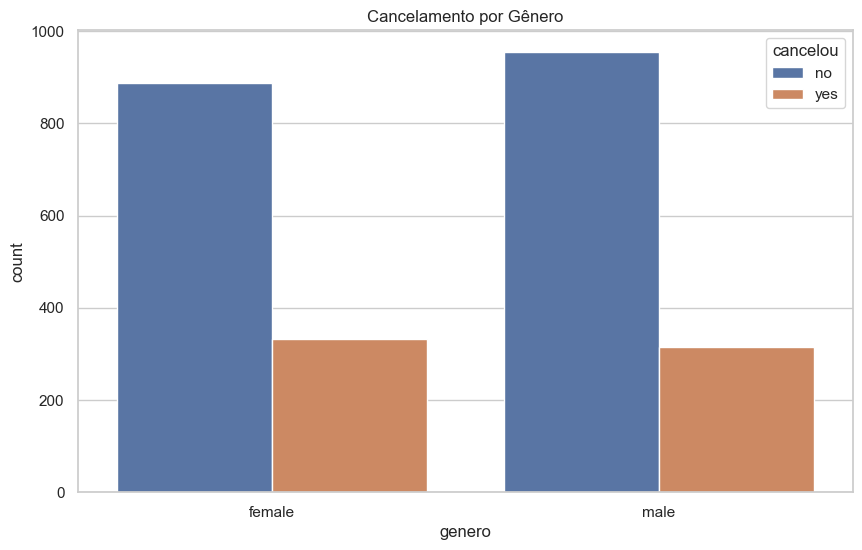

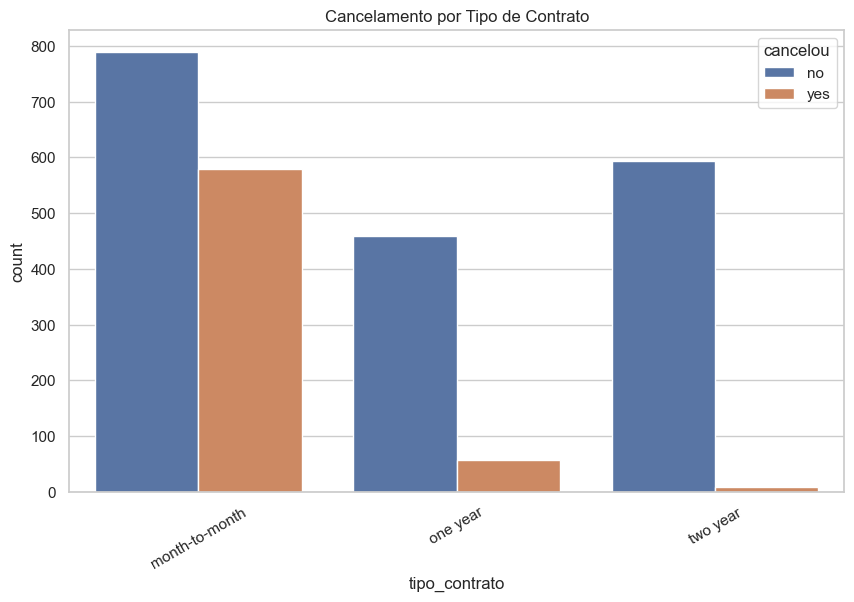

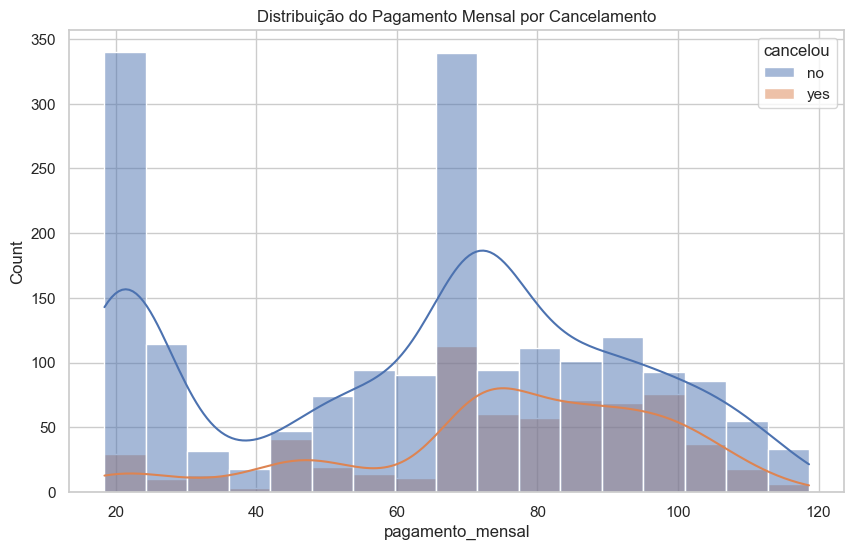

In [4]:

# Distribuição de cancelamento
sns.countplot(data=df, x='cancelou')
plt.title("Distribuição de Cancelamentos")
plt.show()

# Gênero vs Cancelamento
sns.countplot(data=df, x='genero', hue='cancelou')
plt.title("Cancelamento por Gênero")
plt.show()

# Tipo de contrato vs Cancelamento
sns.countplot(data=df, x='tipo_contrato', hue='cancelou')
plt.title("Cancelamento por Tipo de Contrato")
plt.xticks(rotation=30)
plt.show()

# Pagamento mensal vs Cancelamento
sns.histplot(data=df, x='pagamento_mensal', hue='cancelou', kde=True)
plt.title("Distribuição do Pagamento Mensal por Cancelamento")
plt.show()


## 2D) Verificando balanceamento de variáveis booleanas

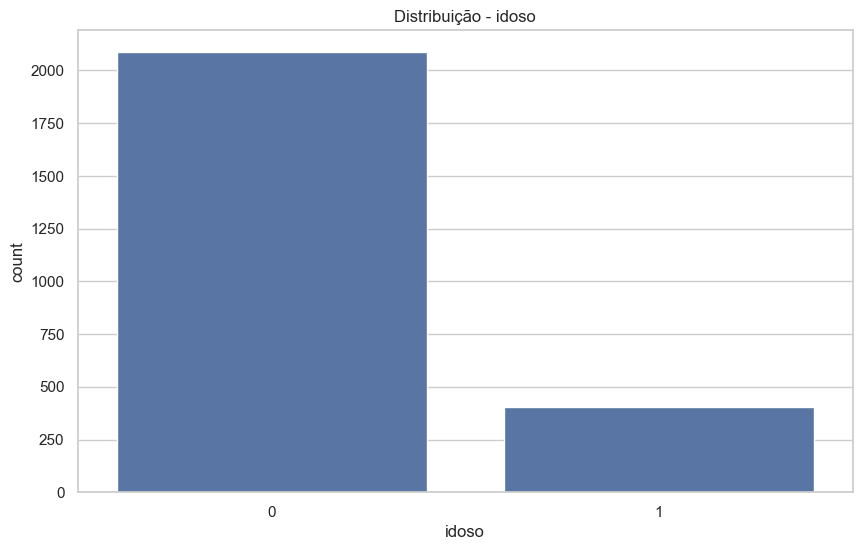

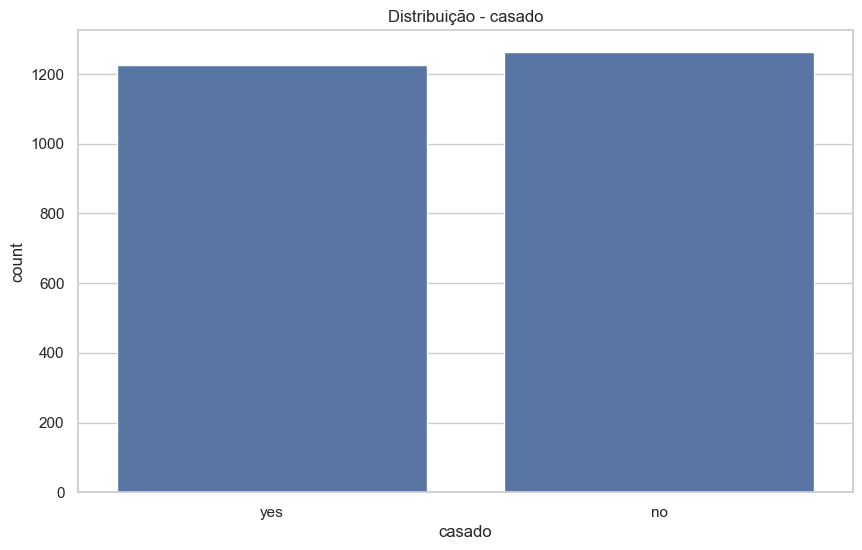

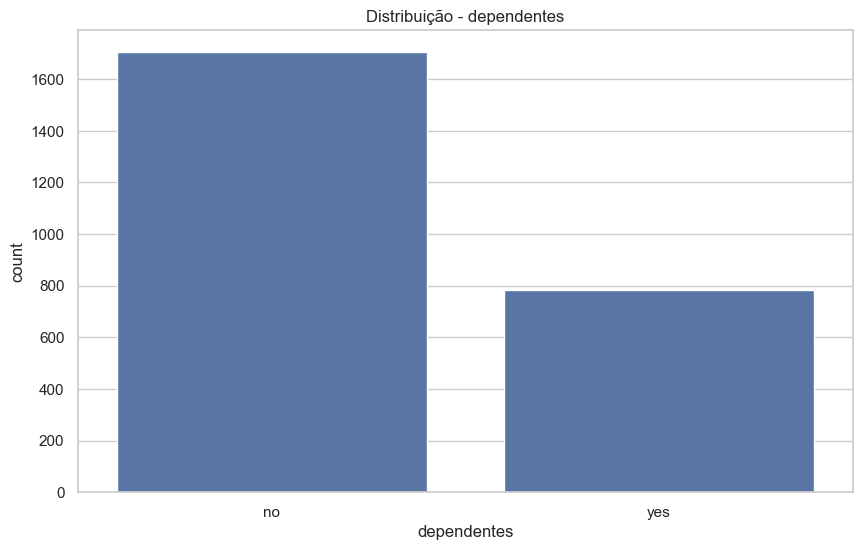

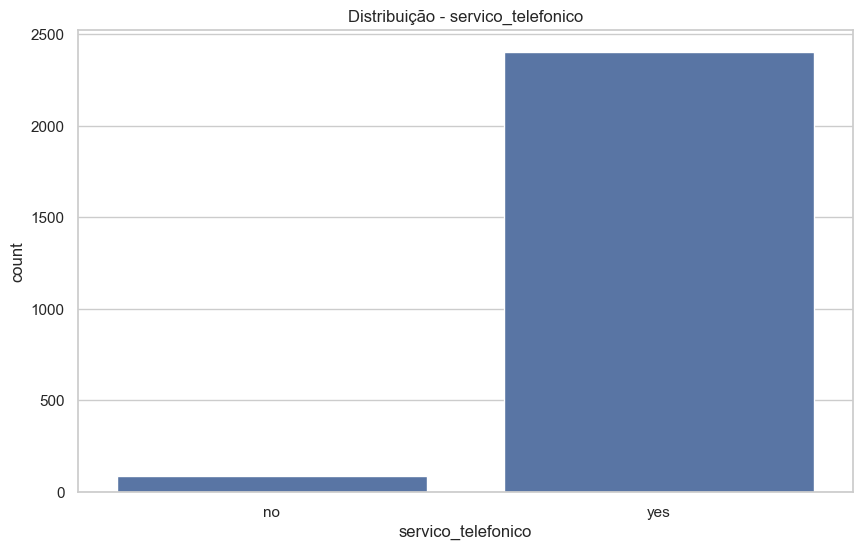

In [ ]:

# Colunas booleanas 
bool_cols = ['idoso', 'casado', 'dependentes', 'servico_telefonico']

for col in bool_cols:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribuição - {col}')
    plt.show()


# MÓDULO 15 - Questão 3: Identificação e Tratamento de Outliers

In [6]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("base_tratada_mod14.csv")
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


## Visualização de possíveis outliers

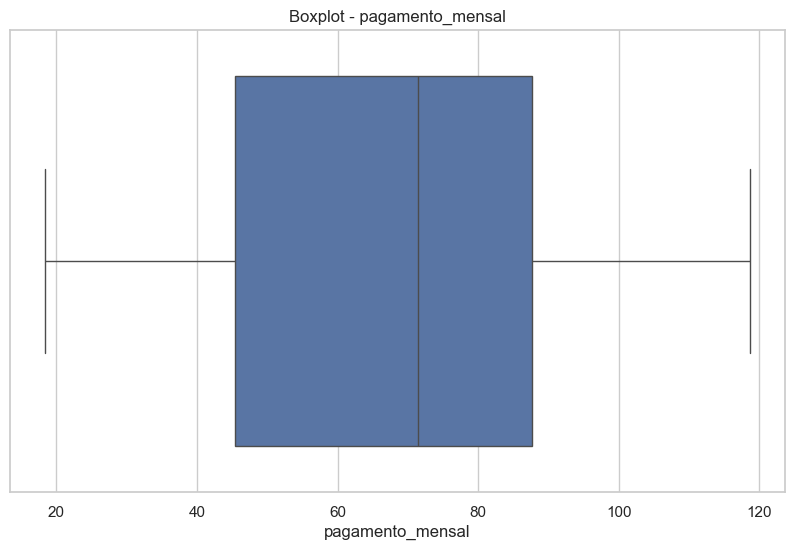

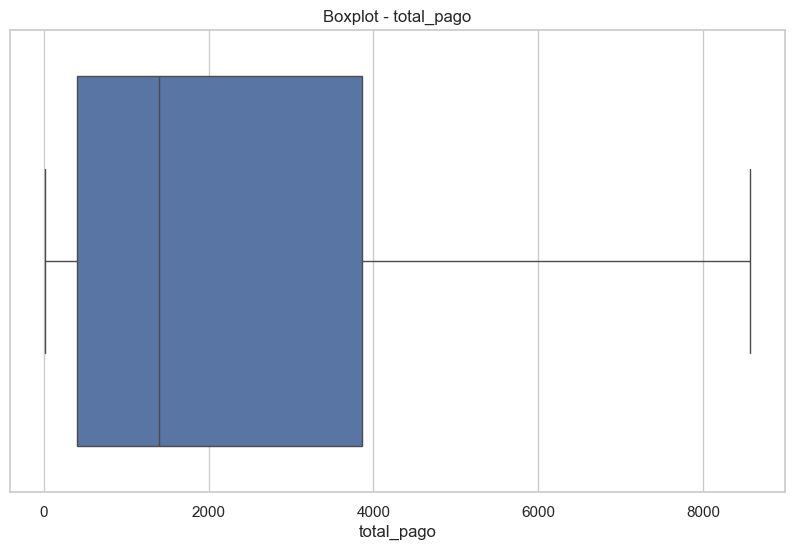

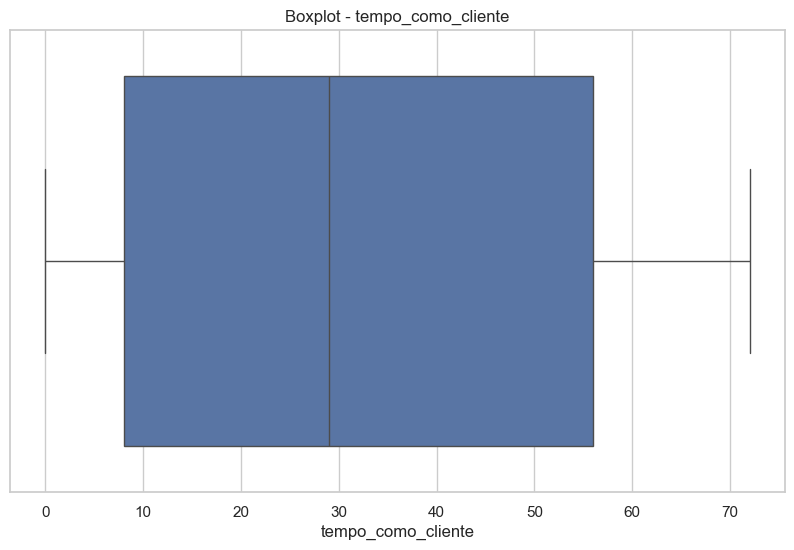

In [7]:

colunas_numericas = ['pagamento_mensal', 'total_pago', 'tempo_como_cliente']

for col in colunas_numericas:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()


## Identificação de outliers usando IQR

In [8]:

def detectar_outliers_iqr(coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

# Detectando outliers
outliers_pagamento = detectar_outliers_iqr('pagamento_mensal')
outliers_total = detectar_outliers_iqr('total_pago')
outliers_tempo = detectar_outliers_iqr('tempo_como_cliente')

print(f"Outliers em 'pagamento_mensal': {len(outliers_pagamento)}")
print(f"Outliers em 'total_pago': {len(outliers_total)}")
print(f"Outliers em 'tempo_como_cliente': {len(outliers_tempo)}")


Outliers em 'pagamento_mensal': 0
Outliers em 'total_pago': 0
Outliers em 'tempo_como_cliente': 0


## Decisão: Manter ou remover os outliers?

In [ ]:

# Decisão: manter os outliers por enquanto
# Justificativa: são dados reais de clientes, e a remoção poderia eliminar casos importantes,
# especialmente de clientes que pagam muito ou estão há muito tempo na empresa.

# Se quisermos removê-los futuramente, poderíamos usar:
# df = df[~df.index.isin(outliers_total.index)]


# MÓDULO 15 - Questão 4: Análise Bivariada

In [9]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("base_tratada_mod14.csv")
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


## A.1) Gênero influencia o cancelamento?

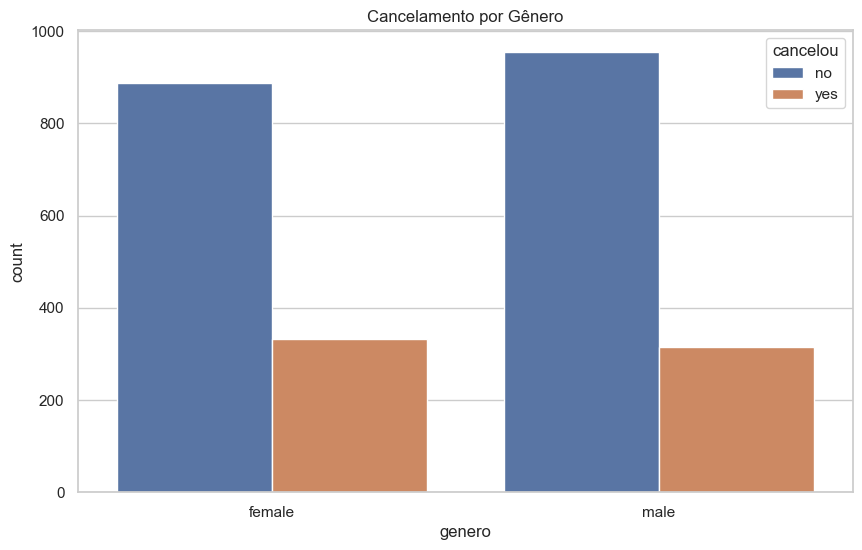

In [10]:

sns.countplot(data=df, x='genero', hue='cancelou')
plt.title("Cancelamento por Gênero")
plt.show()


## A.2) Clientes com contratos mensais cancelam mais?

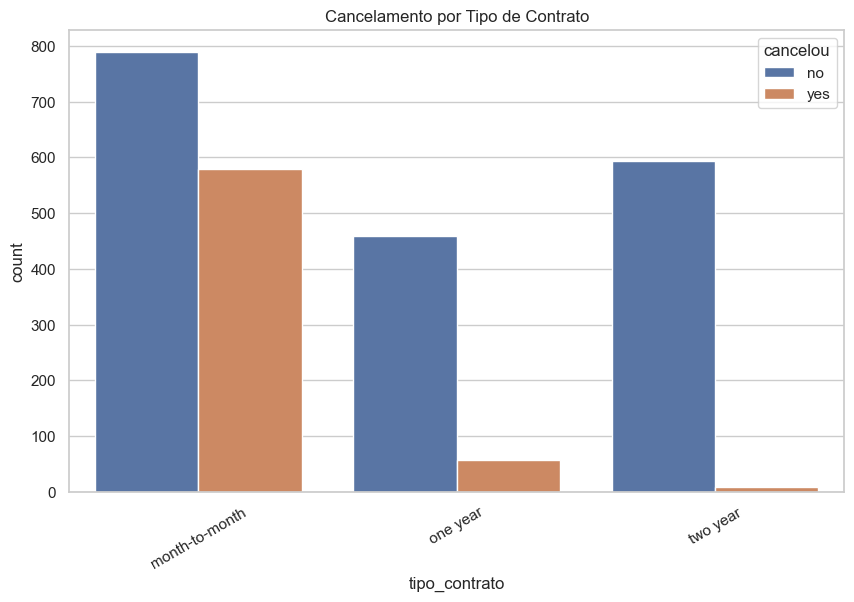

In [11]:

sns.countplot(data=df, x='tipo_contrato', hue='cancelou')
plt.title("Cancelamento por Tipo de Contrato")
plt.xticks(rotation=30)
plt.show()


## A.3) Ter serviço de segurança reduz o churn?

In [ ]:

sns.countplot(data=df, x='servico_seguranca', hue='cancelou')
plt.title("Cancelamento por Serviço de Segurança")
plt.show()


## A.4) A forma de pagamento influencia o cancelamento?

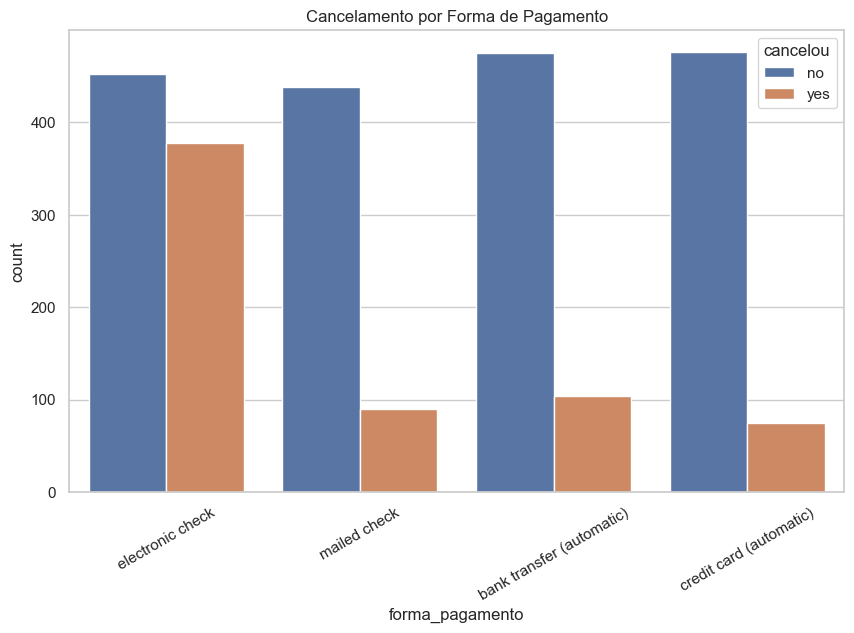

In [12]:

sns.countplot(data=df, x='forma_pagamento', hue='cancelou')
plt.title("Cancelamento por Forma de Pagamento")
plt.xticks(rotation=30)
plt.show()


## A.5) Clientes que pagam mais tendem a cancelar mais?

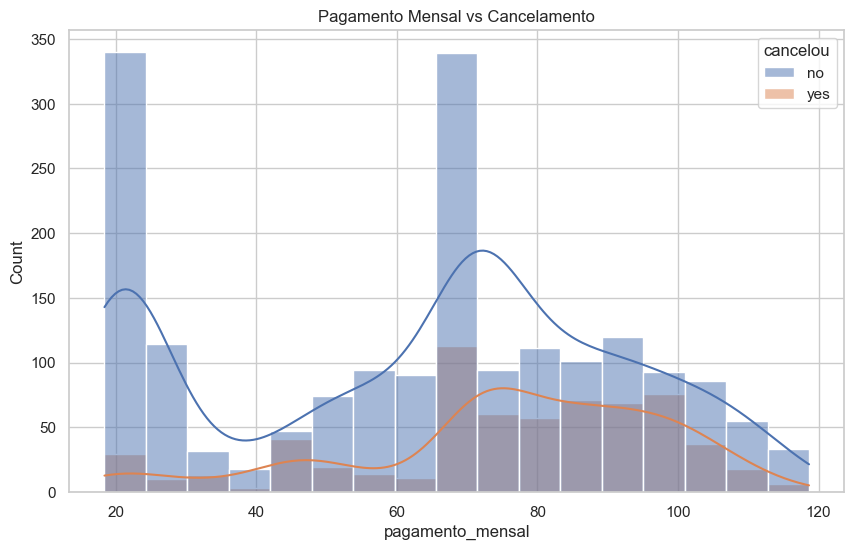

In [13]:

sns.histplot(data=df, x='pagamento_mensal', hue='cancelou', kde=True)
plt.title("Pagamento Mensal vs Cancelamento")
plt.show()


## B) Quais variáveis são mais relevantes para prever o churn?

In [14]:

# Tabela de correlação com variável alvo (convertendo para numérica)
df_corr = df.copy()
df_corr['cancelou'] = df_corr['cancelou'].map({'no': 0, 'yes': 1})

# Selecionando apenas colunas numéricas
correlacoes = df_corr.corr(numeric_only=True)['cancelou'].sort_values(ascending=False)

print("Correlação com 'cancelou':")
print(correlacoes)


Correlação com 'cancelou':
cancelou              1.000000
pagamento_mensal      0.203222
idoso                 0.128108
total_pago           -0.191351
tempo_como_cliente   -0.346532
Name: cancelou, dtype: float64
